In [2]:
# https://covidtracking.com
# https://covid19.healthdata.org/projections

import requests
import pandas as pd
import numpy as np
import math
import json
from IPython.display import Markdown as md
from datetime import timedelta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import cufflinks as cf
import qgrid
from pivottablejs import pivot_ui

import os

# Pandas Settings Change
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_seq_items', 14)
pd.DataFrame._repr_html_ = lambda self: self.to_html(escape=False)

def sparkline(data, figsize=(4, 0.25), **kwargs):
    """
    creates a sparkline
    """
    from matplotlib import pyplot as plt
    from IPython import display
    import base64
    from io import BytesIO
 
    data = list(data)
 
    *_, ax = plt.subplots(1, 1, figsize=figsize, **kwargs)
    ax.plot(data)
    ax.fill_between(range(len(data)), data, len(data)*[min(data)], alpha=0.1)
    ax.set_axis_off()
 
    img = BytesIO()
    plt.savefig(img)
    plt.close()
    return '<img src="data:image/png;base64, {}" />'.format(base64.b64encode(img.getvalue()).decode())

  

# Load State Population file
with open('state_populations.json') as data:
    state_pop = pd.read_json(data)

# Load Available State Hospital Beds (above normal annual hospital activity)
with open('state_hospital_beds.json') as data:
    state_beds = pd.read_json(data)
    
# Pull latest data
states = state_pop['state_code'].to_list()

with open('nyt-us-counties.csv') as data:
    all_county_hist = pd.read_csv(data)

#drop_states = ["PR",
#               "AS",
#               "GU",
#               "MP",
#               "VI",
#              ]

#for state in drop_states:
#    state_pop.drop(state_pop[state_pop.state_code == state].index, inplace=True)
#    state_beds.drop(state_beds[state_beds.state_code == state].index, inplace=True)
#    all_state_hist.drop(all_state_hist[all_state_hist.state == state].index, inplace=True)
    

#states = ["TN"]
#state_df_list = []

#drop_columns = ["total",
#                "dateChecked",
#                "hash",
#               ]

#all_state_hist.drop(columns=drop_columns, inplace=True)
#all_state_hist.fillna(0, inplace=True)
#all_state_hist['date'] = pd.to_datetime(all_state_hist['date'], format="%Y%m%d")
all_county_hist.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [2]:
#all_state_hist.set_index('date', inplace=True)
all_state_hist['positive_14s'] = 0
all_state_hist['totalTestResults_14s'] = 0
for state in states:
    #all_state_hist['positive_14s'] = 0
    #all_state_hist.loc[all_state_hist.state == state, ['positive']].rolling(14).sum().shift(-13)
    state_df = all_state_hist[all_state_hist.state == state]
    state_df['positive_14s'] = state_df['positiveIncrease'].rolling(14).sum().shift(-13)
    state_df['totalTestResults_14s'] = state_df['totalTestResultsIncrease'].rolling(14).sum().shift(-13)
    #state_df_list.append((state, state_df))
    all_state_hist.update(state_df['positive_14s'])
    all_state_hist.update(state_df['totalTestResults_14s'])
    
all_state_hist['pos_rate_14a'] = all_state_hist['positive_14s'].div(all_state_hist['totalTestResults_14s'], fill_value=0)
#all_state_hist.head()

## Rolling 14 Day Sum of Positive Cases

In [3]:
pos_trend = all_state_hist.pivot(index='state', columns='date', values='positive_14s')
pos_trend.fillna(0, inplace=True)
pos_trend['Trend'] = pos_trend.apply(sparkline, axis=1)
pos_trend[pos_trend.columns[-8:]]

date   2020-04-23 00:00:00  2020-04-24 00:00:00  2020-04-25 00:00:00  \
state                                                                  
AK                   102.0                 93.0                 82.0   
AL                  3009.0               2864.0               2946.0   
AR                  1346.0               1570.0               1603.0   
AZ                  2751.0               2933.0               2887.0   
CA                 19060.0              19782.0              21665.0   
CO                  5223.0               4752.0               5746.0   
CT                 13316.0              13383.0              13072.0   
DC                  1838.0               1868.0               1921.0   
DE                  2101.0               2116.0               2097.0   
FL                 12468.0              12643.0              12345.0   
GA                 10946.0              10664.0              10536.0   
HI                   157.0                154.0                136.0   
IA                  2654.0               3057.0               3582.0   
ID                   570.0                483.0                474.0   
IL                 20512.0              21771.0              22597.0   
IN                  6688.0               6773.0               6960.0   
KS                  1376.0               1611.0               1788.0   
KY                  2027.0               1788.0               2086.0   
LA                  7456.0               6887.0               6498.0   
MA                 29149.0              30091.0              30582.0   
MD                  9552.0               9648.0              10072.0   
ME                   377.0                379.0                374.0   
MI                 13787.0              13858.0              13210.0   
MN                  1700.0               1849.0               2019.0   
MO                  2782.0               2826.0               2802.0   
MS                  2893.0               2965.0               3076.0   
MT                    88.0                 79.0                 68.0   
NC                  3957.0               4144.0               4311.0   
ND                   440.0                470.0                510.0   
NE                  1246.0               1489.0               1721.0   
NH                   800.0                851.0                835.0   
NJ                 48962.0              47608.0              47372.0   
NM                  1345.0               1288.0               1430.0   
NV                  1752.0               1814.0               1839.0   
NY                103523.0             101078.0             101685.0   
OH                  8630.0               8745.0               8796.0   
OK                  1333.0               1327.0               1325.0   
OR                   806.0                856.0                882.0   
PA                 18419.0              18673.0              18394.0   
RI                  4529.0               4684.0               4780.0   
SC                  2125.0               1852.0               2046.0   
SD                  1509.0               1504.0               1521.0   
TN                  3632.0               3864.0               4075.0   
TX                 11714.0              11135.0              11212.0   
UT                  1636.0               1680.0               1742.0   
VA                  6585.0               6660.0               6825.0   
VT                   197.0                148.0                132.0   
WA                  3503.0               3356.0               3359.0   
WI                  2167.0               2288.0               2474.0   
WV                   444.0                434.0                443.0   
WY                    96.0                 96.0                 88.0   

date   2020-04-26 00:00:00  2020-04-27 00:00:00  2020-04-28 00:00:00  \
state                                                                  
AK                    69.0             

## Rolling 14 Day Average of Daily Positive Test Rate

In [4]:
rate_trend = all_state_hist.pivot(index='state', columns='date', values='pos_rate_14a')
rate_trend.fillna(0, inplace=True)
rate_trend['Trend'] = rate_trend.apply(sparkline, axis=1)
rate_trend[rate_trend.columns[-8:]]

date   2020-04-23 00:00:00  2020-04-24 00:00:00  2020-04-25 00:00:00  \
state                                                                  
AK                0.020656             0.019179             0.010250   
AL                0.094581             0.090435             0.058808   
AR                0.080894             0.085058             0.082311   
AZ                0.127841             0.127633             0.131359   
CA                0.059825             0.060071             0.064873   
CO                0.243542             0.241574             0.238068   
CT                0.350467             0.354517             0.346086   
DC                0.255065             0.260240             0.264491   
DE                0.299203             0.375310             0.317968   
FL                0.086488             0.082029             0.077076   
GA                0.182503             0.174737             0.156555   
HI                0.015130             0.014342             0.012941   
IA                0.185737             0.190824             0.208038   
ID                0.102500             0.080540             0.084688   
IL                0.221850             0.213222             0.206426   
IN                0.167590             0.167181             0.171602   
KS                0.130513             0.132331             0.139079   
KY                0.142006             0.096357             0.100900   
LA                0.132208             0.133895             0.154394   
MA                0.266622             0.266833             0.259249   
MD                0.247647             0.239595             0.240468   
ME                0.034047             0.034221             0.033785   
MI                0.225031             0.215682             0.194179   
MN                0.088293             0.092947             0.095267   
MO                0.132754             0.115503             0.116527   
MS                0.083862             0.085770             0.081628   
MT                0.021918             0.020627             0.017365   
NC                0.081797             0.096509             0.096073   
ND                0.059946             0.059941             0.055016   
NE                0.143598             0.160834             0.172307   
NH                0.123820             0.124215             0.115427   
NJ                0.526722             0.515021             0.506690   
NM                0.077188             0.066170             0.058578   
NV                0.134998             0.134940             0.135012   
NY                0.340121             0.323169             0.302105   
OH                0.186232             0.180020             0.172569   
OK                0.051753             0.055347             0.043548   
OR                0.043926             0.043091             0.043765   
PA                0.251949             0.255361             0.252727   
RI                0.141487             0.142107             0.146249   
SC                0.124298             0.113759             0.108134   
SD                0.218127             0.209558             0.200342   
TN                0.057422             0.056385             0.054641   
TX                0.098483             0.087795             0.078801   
UT                0.038718             0.038238             0.036551   
VA                0.209101             0.198474             0.199684   
VT                0.034738             0.024350             0.024336   
WA                0.070632             0.069206             0.071404   
WI                0.097617             0.096801             0.099230   
WV                0.031619             0.028448             0.025294   
WY                0.028095             0.031414             0.032750   

date   2020-04-26 00:00:00  2020-04-27 00:00:00  2020-04-28 00:00:00  \
state                                                                  
AK                0.008478             

## Charts

In [5]:
rate_trend.drop(columns="Trend", inplace=True)

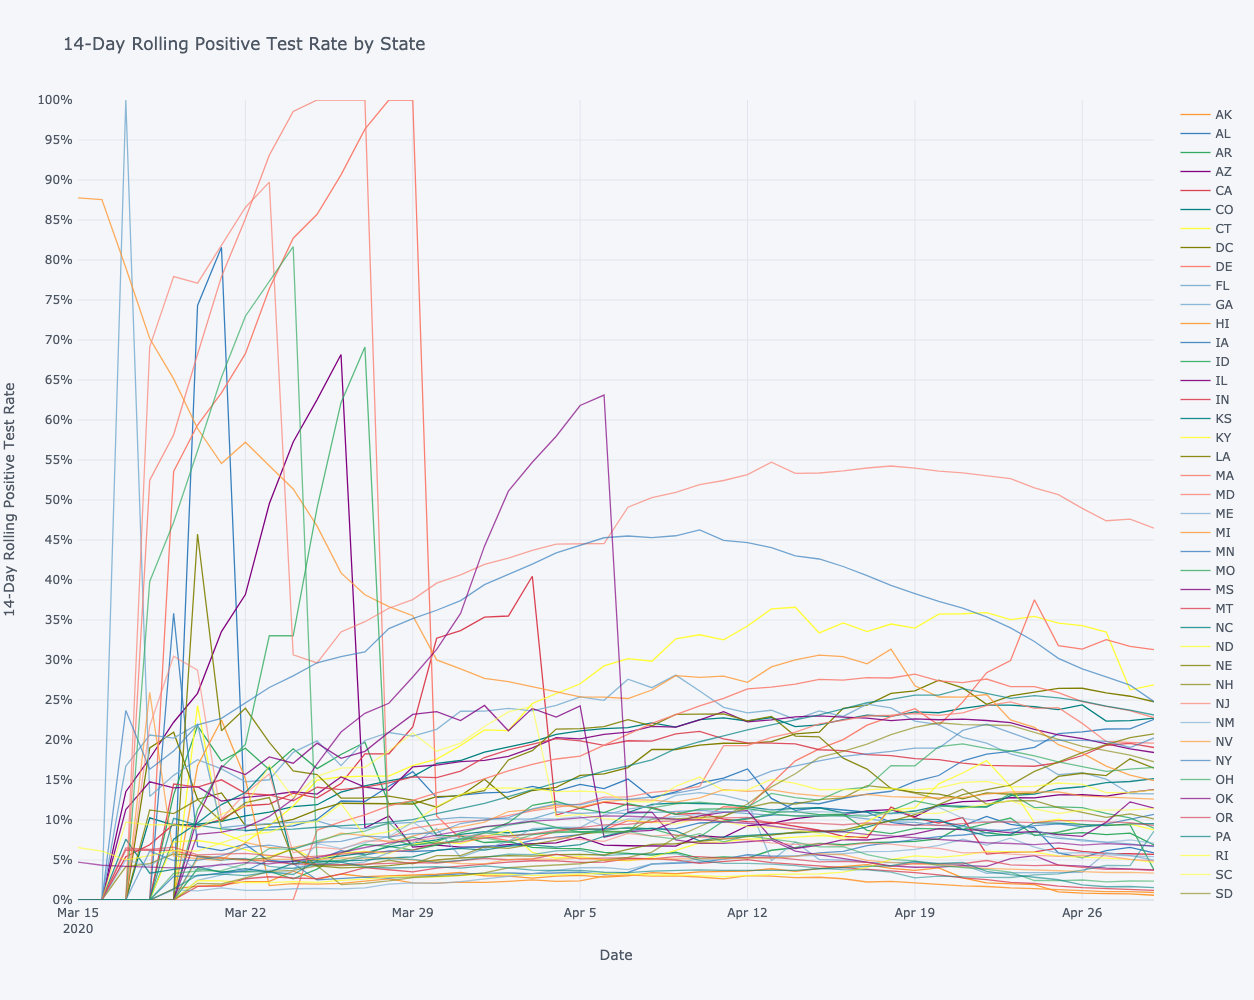

In [6]:
#covid_sort = covid.sort_values(by='positiveShareDelta', ascending=False)
#covid_sort['polarity'] = covid_sort['positiveShareDelta'] < 0
#colors = []
#for polarity in covid_sort.polarity.values:
#    if polarity:
#        colors.append("green")
#    else:
#        colors.append("red")
#fig = go.Figure()
#fig.add_trace(go.line(x=covid_sort.state, y=covid_sort.positiveShareDelta, marker_color=colors))
#fig.layout.xaxis.tickfont.size = 8
#fig.layout.yaxis.tickformat = '0.0%'
#fig.update_layout(title_text='Share of Positive Tests vs Share of Population Delta')
#fig.update_layout(
#    autosize=False,
#    width=800,
#    height=800,
#    margin=dict(
#        l=50,
#        r=50,
#        b=100,
#        t=100,
#        pad=4
#    ),
#)

#rate_trend.drop(columns="Trend", inplace=True)
line_graph = all_state_hist.pivot(index='date', columns='state', values='pos_rate_14a')
line_graph.fillna(0, inplace=True)
#line_graph.head()
#all_state_hist[['state', 'pos_rate_14a']].groupby(["state"]).head()

fig = line_graph.loc['2020-03-15':].iplot(asFigure=True, xTitle="Date", yTitle="14-Day Rolling Positive Test Rate", title="14-Day Rolling Positive Test Rate by State")
fig.layout.yaxis.tickformat = '0.0%'
fig.update_yaxes(range=[0,1], dtick=0.05)
fig.update_layout(
    autosize=False,
    width=1200,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
fig.show()